In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import murmurhash3_32
from random import randint
import csv
import sys

In [2]:
def hashfunc(m):
    ss = randint(1, 99999999)
    def hash_m(x):
        return murmurhash3_32(x,seed=ss)%m
    return hash_m

In [3]:
class BloomFilter():
    def __init__(self, n, hash_len):
        self.n = n
        self.hash_len = int(hash_len)
        self.k = np.round(self.hash_len/n*0.6931472)
        self.h = []
        for i in range(self.k.astype(int)):
            self.h.append(hashfunc(self.hash_len))
        self.table = np.zeros(self.hash_len, dtype=int)
    def insert(self, key):
        for i in key:
            for j in range(self.k.astype(int)):
                t = self.h[j](i)
                self.table[t] = 1
    def test(self, key):
        test_result = np.zeros(len(key))
        ss=0
        for i in key:
            match = 0
            for j in range(self.k.astype(int)):
                t = self.h[j](i)
                match += 1*(self.table[t] == 1)
            if match == self.k.astype(int):
                test_result[ss] = 1
            ss += 1  
        return test_result

### Insert the low risk Malicious URLs into the bloom filter

In [6]:
train_data = pd.read_csv('C:/COMP 580/Final Project/URL_output/all_output.txt', sep = '\t')
test_data = pd.read_csv('C:/COMP 580/Final Project/URL_output/test_output.txt', sep = '\t')

train_negative = train_data.loc[(train_data.loc[:,'label']==-1),:]
train_positive = train_data.loc[(train_data.loc[:,'label']==1),:]

test_negative = test_data.loc[(test_data.loc[:,'label']==-1),:]
test_positive = test_data.loc[(test_data.loc[:,'label']==1),:]

In [39]:
train_negative.shape

(344821, 4)

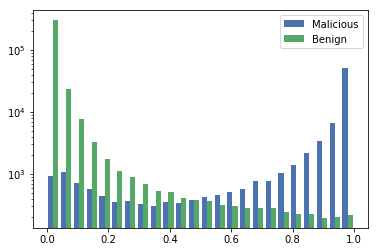

In [37]:
plt.style.use('seaborn-deep')

x = train_data.loc[train_data.loc[:,'label']==1,'score']
y = train_data.loc[train_data.loc[:,'label']==-1,'score']
bins = np.linspace(0, 1, 25)

plt.hist([x, y], bins, log=True, label=['Malicious', 'Benign'])
plt.legend(loc='upper right')
plt.show()

### Testing the FNR and FPR (insample testing)

#### First Round: Briefly search the optimal threshold (Hash_len = 100000)

In [8]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.3, 1, 15)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 100000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

False positive items:  5524.0
False positive items:  4755.0
False positive items:  4129.0
False positive items:  3641.0
False positive items:  3211.0
False positive items:  2862.0
False positive items:  2588.0
False positive items:  2452.0
False positive items:  2555.0
False positive items:  2869.0
False positive items:  3935.0
False positive items:  6551.0
False positive items:  13741.0
False positive items:  32578.0
False positive items:  167169.0


#### Second Round: Detaily search the optimal threshold (Hash_len = 100000)

In [10]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.60, 0.70, 11)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 100000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

False positive items:  2571.0
False positive items:  2555.0
False positive items:  2544.0
False positive items:  2515.0
False positive items:  2492.0
False positive items:  2486.0
False positive items:  2482.0
False positive items:  2439.0
False positive items:  2480.0
False positive items:  2448.0
False positive items:  2553.0


#### First Round: Briefly search the optimal threshold (Hash_len = 150000)

In [12]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.3, 1, 15)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 150000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('Threshold: ', threshold, '   False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

Threshold:  0.3 False positive items:  5519.0
Threshold:  0.35 False positive items:  4749.0
Threshold:  0.39999999999999997 False positive items:  4110.0
Threshold:  0.44999999999999996 False positive items:  3604.0
Threshold:  0.5 False positive items:  3130.0
Threshold:  0.5499999999999999 False positive items:  2709.0
Threshold:  0.6 False positive items:  2338.0
Threshold:  0.6499999999999999 False positive items:  2013.0
Threshold:  0.7 False positive items:  1695.0
Threshold:  0.75 False positive items:  1417.0
Threshold:  0.7999999999999999 False positive items:  1288.0
Threshold:  0.8499999999999999 False positive items:  1505.0
Threshold:  0.8999999999999999 False positive items:  3079.0
Threshold:  0.95 False positive items:  9900.0
Threshold:  1.0 False positive items:  123734.0


#### Second Round: Detaily search the optimal threshold (Hash_len = 150000)

In [13]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.75, 0.85, 11)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 150000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('Threshold: ', threshold, '   False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

Threshold:  0.75    False positive items:  1395.0
Threshold:  0.76    False positive items:  1386.0
Threshold:  0.77    False positive items:  1342.0
Threshold:  0.78    False positive items:  1311.0
Threshold:  0.79    False positive items:  1315.0
Threshold:  0.8    False positive items:  1308.0
Threshold:  0.8099999999999999    False positive items:  1276.0
Threshold:  0.82    False positive items:  1309.0
Threshold:  0.83    False positive items:  1307.0
Threshold:  0.84    False positive items:  1443.0
Threshold:  0.85    False positive items:  1520.0


#### First Round: Briefly search the optimal threshold (Hash_len = 200000)

In [14]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.3, 1, 15)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 200000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('Threshold: ', threshold, '   False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

Threshold:  0.3    False positive items:  5519.0
Threshold:  0.35    False positive items:  4749.0
Threshold:  0.39999999999999997    False positive items:  4110.0
Threshold:  0.44999999999999996    False positive items:  3604.0
Threshold:  0.5    False positive items:  3129.0
Threshold:  0.5499999999999999    False positive items:  2705.0
Threshold:  0.6    False positive items:  2331.0
Threshold:  0.6499999999999999    False positive items:  1991.0
Threshold:  0.7    False positive items:  1638.0
Threshold:  0.75    False positive items:  1314.0
Threshold:  0.7999999999999999    False positive items:  1049.0
Threshold:  0.8499999999999999    False positive items:  832.0
Threshold:  0.8999999999999999    False positive items:  983.0
Threshold:  0.95    False positive items:  3304.0
Threshold:  1.0    False positive items:  80953.0


#### Second Round: Detaily search the optimal threshold (Hash_len = 200000)

In [15]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.80, 0.90, 11)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 200000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('Threshold: ', threshold, '   False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

Threshold:  0.8    False positive items:  1050.0
Threshold:  0.81    False positive items:  986.0
Threshold:  0.8200000000000001    False positive items:  955.0
Threshold:  0.8300000000000001    False positive items:  906.0
Threshold:  0.8400000000000001    False positive items:  864.0
Threshold:  0.8500000000000001    False positive items:  851.0
Threshold:  0.86    False positive items:  828.0
Threshold:  0.87    False positive items:  822.0
Threshold:  0.88    False positive items:  847.0
Threshold:  0.89    False positive items:  870.0
Threshold:  0.9    False positive items:  951.0


#### First Round: Briefly search the optimal threshold (Hash_len = 250000)

In [16]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.3, 1, 15)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 250000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('Threshold: ', threshold, '   False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

Threshold:  0.3    False positive items:  5519.0
Threshold:  0.35    False positive items:  4749.0
Threshold:  0.39999999999999997    False positive items:  4110.0
Threshold:  0.44999999999999996    False positive items:  3604.0
Threshold:  0.5    False positive items:  3129.0
Threshold:  0.5499999999999999    False positive items:  2705.0
Threshold:  0.6    False positive items:  2331.0
Threshold:  0.6499999999999999    False positive items:  1991.0
Threshold:  0.7    False positive items:  1636.0
Threshold:  0.75    False positive items:  1310.0
Threshold:  0.7999999999999999    False positive items:  1024.0
Threshold:  0.8499999999999999    False positive items:  754.0
Threshold:  0.8999999999999999    False positive items:  578.0
Threshold:  0.95    False positive items:  1159.0
Threshold:  1.0    False positive items:  58925.0


#### Second Round: Detaily search the optimal threshold (Hash_len = 250000)

In [17]:
## Control FPR = 0.001 in the training data
thresholds = np.linspace(0.85, 0.95, 11)
FPR_count = np.zeros(len(thresholds))
ss = 0

hash_len = 250000
for threshold in thresholds:
    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n = len(url)
    bloom_filter = BloomFilter(n, hash_len)
    bloom_filter.insert(url)
    ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > threshold),'url']
    bloom_negative = train_negative.loc[(train_negative.loc[:,'score'] <= threshold),'url']
    n1 = bloom_filter.test(bloom_negative)
    print('Threshold: ', threshold, '   False positive items: ', sum(n1) + len(ML_positive))
    FPR_count[ss] = sum(n1) + len(ML_positive)
    ss += 1

Threshold:  0.85    False positive items:  755.0
Threshold:  0.86    False positive items:  717.0
Threshold:  0.87    False positive items:  670.0
Threshold:  0.88    False positive items:  631.0
Threshold:  0.89    False positive items:  595.0
Threshold:  0.8999999999999999    False positive items:  585.0
Threshold:  0.9099999999999999    False positive items:  591.0
Threshold:  0.9199999999999999    False positive items:  639.0
Threshold:  0.9299999999999999    False positive items:  671.0
Threshold:  0.94    False positive items:  851.0
Threshold:  0.95    False positive items:  1159.0


## <font color='red'> Sandwich ML based Bloom Filter</font>

### Hash_len = 100000

#### Performance of training data (Hash_len = 100000)

In [19]:
thresholds = np.linspace(0.55, 0.65, 11)

for threshold in thresholds:
    url_raw = train_positive.loc[:,'url']
    n = len(url_raw)
    hash_len1 = 20000
    bloom_filter1 = BloomFilter(n, hash_len1)
    bloom_filter1.insert(url_raw)

    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n2 = len(url)
    hash_len2 = 80000
    bloom_filter2 = BloomFilter(n2, hash_len2)
    bloom_filter2.insert(url)

    negative_url_raw = train_negative.loc[:,'url']
    negative_score_raw = train_negative.loc[:,'score']
    test_result = bloom_filter1.test(negative_url_raw)


    negative_url_filtered = negative_url_raw[test_result==1]
    negative_score_filtered = negative_score_raw[test_result==1]
    bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
    ML_positive = negative_url_filtered[negative_score_filtered > threshold]

    test_result2 = bloom_filter2.test(bloom_negative)
    print('Threshold: ', threshold, '    False positive items: ', sum(test_result2) + len(ML_positive))

Threshold:  0.55     False positive items:  3435.0
Threshold:  0.56     False positive items:  3318.0
Threshold:  0.5700000000000001     False positive items:  3417.0
Threshold:  0.5800000000000001     False positive items:  3378.0
Threshold:  0.5900000000000001     False positive items:  3517.0
Threshold:  0.6000000000000001     False positive items:  3416.0
Threshold:  0.61     False positive items:  3544.0
Threshold:  0.62     False positive items:  3535.0
Threshold:  0.63     False positive items:  3651.0
Threshold:  0.64     False positive items:  3729.0
Threshold:  0.65     False positive items:  3810.0


#### Performance on testing data

In [28]:
negative_url_raw = test_negative.loc[:,'url']
negative_score_raw = test_negative.loc[:,'score']
test_result = bloom_filter1.test(negative_url_raw)


negative_url_filtered = negative_url_raw[test_result==1]
negative_score_filtered = negative_score_raw[test_result==1]
bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
ML_positive = negative_url_filtered[negative_score_filtered > threshold]

test_result2 = bloom_filter2.test(bloom_negative)
print('False positive items: ', sum(test_result2) + len(ML_positive))

False positive items:  2132.0


### Hash_len = 150000

#### Performance of training data

In [21]:
thresholds = np.linspace(0.65, 0.75, 11)

for threshold in thresholds:
    url_raw = train_positive.loc[:,'url']
    n = len(url_raw)
    hash_len1 = 30000
    bloom_filter1 = BloomFilter(n, hash_len1)
    bloom_filter1.insert(url_raw)

    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n2 = len(url)
    hash_len2 = 120000
    bloom_filter2 = BloomFilter(n2, hash_len2)
    bloom_filter2.insert(url)

    negative_url_raw = train_negative.loc[:,'url']
    negative_score_raw = train_negative.loc[:,'score']
    test_result = bloom_filter1.test(negative_url_raw)


    negative_url_filtered = negative_url_raw[test_result==1]
    negative_score_filtered = negative_score_raw[test_result==1]
    bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
    ML_positive = negative_url_filtered[negative_score_filtered > threshold]

    test_result2 = bloom_filter2.test(bloom_negative)
    print('Threshold: ', threshold, '    False positive items: ', sum(test_result2) + len(ML_positive))

Threshold:  0.65     False positive items:  2105.0
Threshold:  0.66     False positive items:  2055.0
Threshold:  0.67     False positive items:  2024.0
Threshold:  0.68     False positive items:  1974.0
Threshold:  0.6900000000000001     False positive items:  1931.0
Threshold:  0.7     False positive items:  1933.0
Threshold:  0.71     False positive items:  1876.0
Threshold:  0.72     False positive items:  1842.0
Threshold:  0.73     False positive items:  1867.0
Threshold:  0.74     False positive items:  1814.0
Threshold:  0.75     False positive items:  1820.0


#### Performance on testing data

In [37]:
negative_url_raw = test_negative.loc[:,'url']
negative_score_raw = test_negative.loc[:,'score']
test_result = bloom_filter1.test(negative_url_raw)


negative_url_filtered = negative_url_raw[test_result==1]
negative_score_filtered = negative_score_raw[test_result==1]
bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
ML_positive = negative_url_filtered[negative_score_filtered > threshold]

test_result2 = bloom_filter2.test(bloom_negative)
print('False positive items: ', sum(test_result2) + len(ML_positive))

False positive items:  1419.0


### Hash_len = 200000

#### Performance of training data

In [22]:
thresholds = np.linspace(0.75, 0.85, 11)

for threshold in thresholds:
    url_raw = train_positive.loc[:,'url']
    n = len(url_raw)
    hash_len1 = 40000
    bloom_filter1 = BloomFilter(n, hash_len1)
    bloom_filter1.insert(url_raw)

    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n2 = len(url)
    hash_len2 = 160000
    bloom_filter2 = BloomFilter(n2, hash_len2)
    bloom_filter2.insert(url)

    negative_url_raw = train_negative.loc[:,'url']
    negative_score_raw = train_negative.loc[:,'score']
    test_result = bloom_filter1.test(negative_url_raw)


    negative_url_filtered = negative_url_raw[test_result==1]
    negative_score_filtered = negative_score_raw[test_result==1]
    bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
    ML_positive = negative_url_filtered[negative_score_filtered > threshold]

    test_result2 = bloom_filter2.test(bloom_negative)
    print('Threshold: ', threshold, '    False positive items: ', sum(test_result2) + len(ML_positive))

Threshold:  0.75     False positive items:  1358.0
Threshold:  0.76     False positive items:  1320.0
Threshold:  0.77     False positive items:  1296.0
Threshold:  0.78     False positive items:  1250.0
Threshold:  0.79     False positive items:  1203.0
Threshold:  0.8     False positive items:  1190.0
Threshold:  0.8099999999999999     False positive items:  1148.0
Threshold:  0.82     False positive items:  1136.0
Threshold:  0.83     False positive items:  1142.0
Threshold:  0.84     False positive items:  1189.0
Threshold:  0.85     False positive items:  1237.0


#### Performance on testing data

In [22]:
negative_url_raw = test_negative.loc[:,'url']
negative_score_raw = test_negative.loc[:,'score']
test_result = bloom_filter1.test(negative_url_raw)


negative_url_filtered = negative_url_raw[test_result==1]
negative_score_filtered = negative_score_raw[test_result==1]
bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
ML_positive = negative_url_filtered[negative_score_filtered > threshold]

test_result2 = bloom_filter2.test(bloom_negative)
print('False positive items: ', sum(test_result2) + len(ML_positive))

False positive items:  991.0


### Hash_len = 250000

#### Performance of training data

In [23]:
thresholds = np.linspace(0.80, 0.90, 11)

for threshold in thresholds:
    url_raw = train_positive.loc[:,'url']
    n = len(url_raw)
    hash_len1 = 50000
    bloom_filter1 = BloomFilter(n, hash_len1)
    bloom_filter1.insert(url_raw)

    url = train_positive.loc[(train_positive.loc[:,'score'] <= threshold),'url']
    n2 = len(url)
    hash_len2 = 200000
    bloom_filter2 = BloomFilter(n2, hash_len2)
    bloom_filter2.insert(url)

    negative_url_raw = train_negative.loc[:,'url']
    negative_score_raw = train_negative.loc[:,'score']
    test_result = bloom_filter1.test(negative_url_raw)


    negative_url_filtered = negative_url_raw[test_result==1]
    negative_score_filtered = negative_score_raw[test_result==1]
    bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
    ML_positive = negative_url_filtered[negative_score_filtered > threshold]

    test_result2 = bloom_filter2.test(bloom_negative)
    print('Threshold: ', threshold, '    False positive items: ', sum(test_result2) + len(ML_positive))

Threshold:  0.8     False positive items:  1045.0
Threshold:  0.81     False positive items:  989.0
Threshold:  0.8200000000000001     False positive items:  943.0
Threshold:  0.8300000000000001     False positive items:  901.0
Threshold:  0.8400000000000001     False positive items:  876.0
Threshold:  0.8500000000000001     False positive items:  843.0
Threshold:  0.86     False positive items:  823.0
Threshold:  0.87     False positive items:  821.0
Threshold:  0.88     False positive items:  809.0
Threshold:  0.89     False positive items:  890.0
Threshold:  0.9     False positive items:  959.0


#### Performance on testing data

In [40]:
negative_url_raw = test_negative.loc[:,'url']
negative_score_raw = test_negative.loc[:,'score']
test_result = bloom_filter1.test(negative_url_raw)


negative_url_filtered = negative_url_raw[test_result==1]
negative_score_filtered = negative_score_raw[test_result==1]
bloom_negative = negative_url_filtered[negative_score_filtered <= threshold]
ML_positive = negative_url_filtered[negative_score_filtered > threshold]

test_result2 = bloom_filter2.test(bloom_negative)
print('False positive items: ', sum(test_result2) + len(ML_positive))

False positive items:  731.0


## <font color='red'> Enhanced Version of ML based Bloom Filter</font>

In [25]:
class BloomFilter_3():
    def __init__(self, n, hash_len):
        self.n = n
        self.hash_len = int(hash_len)
        self.k = np.round(self.hash_len/n*0.6931472)
        self.h = []
        for i in range(self.k.astype(int)):
            self.h.append(hashfunc(self.hash_len))
        self.table = np.zeros(self.hash_len, dtype=int)
    def insert(self, key):
        for i in key:
            for j in range(self.k.astype(int)):
                t = self.h[j](i)
                self.table[t] = 1
    def test(self, key):
        test_result = 0
        match = 0
        for j in range(self.k.astype(int)):
            t = self.h[j](key)
            match += 1*(self.table[t] == 1)
        if match == self.k.astype(int):
            test_result = 1  
        return test_result

#### Search Optimal k_max and c (Hash_len = 100000)

In [26]:
c_set = np.linspace(1.6, 2.5, 10)

R_sum = 100000

for num_group in range(8,13):
    for c in c_set:
        ### Determine the thresholds
        thresholds = np.zeros(num_group+1)
        thresholds[0] = 0
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        tau = sum(c**np.arange(0, num_group, 1)) 
        num_piece = int(num_negative/tau)
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for i in range(num_group-1):
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        
        ### Count the keys of each group
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        count_key = np.zeros(num_group)
        url_group = []
        bloom_filter = []
        for j in range(int(num_group)):
            count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
            url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])
            
        ### Search the Bloom filters' size
        R = np.zeros(num_group - 1)
        R[:] = 0.5*R_sum
        kk = 1
        while abs(sum(R)-R_sum)>200:
            if (sum(R)>R_sum):
                R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
            else:
                R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
            for j in range(1, int(num_group-1)):
                R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
            if int((0.5*R_sum)*(0.5)**kk+1) == 1:
                break
            kk += 1
        
        Bloom_Filters = []
        for j in range(int(num_group-1)):
            Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
            Bloom_Filters[j].insert(url_group[j])
            
        ### Test URLs
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] >= thresholds[-2]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s < thresholds)[0])
            test_result[ss] = Bloom_Filters[ix-1].test(url_s)
            ss += 1
        print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 4934.0
False positive items:  [8, 1.7000000000000002] 3526.0
False positive items:  [8, 1.8] 2572.0
False positive items:  [8, 1.9000000000000001] 1946.0
False positive items:  [8, 2.0] 1579.0
False positive items:  [8, 2.1] 1347.0
False positive items:  [8, 2.2] 1292.0
False positive items:  [8, 2.3] 1364.0
False positive items:  [8, 2.4] 1443.0
False positive items:  [8, 2.5] 1465.0
False positive items:  [9, 1.6] 3088.0
False positive items:  [9, 1.7000000000000002] 2124.0
False positive items:  [9, 1.8] 1610.0
False positive items:  [9, 1.9000000000000001] 1366.0
False positive items:  [9, 2.0] 1310.0
False positive items:  [9, 2.1] 1503.0
False positive items:  [9, 2.2] 1430.0
False positive items:  [9, 2.3] 1647.0
False positive items:  [9, 2.4] 1617.0
False positive items:  [9, 2.5] 1557.0
False positive items:  [10, 1.6] 2016.0
False positive items:  [10, 1.7000000000000002] 1508.0
False positive items:  [10, 1.8] 1343.0
False positive items:  [1

#### Corresponding performance on the testing set (Hash_len = 100000)

In [15]:
c = 2.3
num_group = 8

R_sum = 100000

### Determine the thresholds
thresholds = np.zeros(num_group+1)
thresholds[0] = 0
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
tau = sum(c**np.arange(0, num_group, 1)) 
num_piece = int(num_negative/tau)
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for i in range(num_group-1):
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]

### Count the keys of each group
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

count_key = np.zeros(num_group)
url_group = []
bloom_filter = []
for j in range(int(num_group)):
    count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
    url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])

### Search the Bloom filters' size
R = np.zeros(num_group - 1)
R[:] = 0.5*R_sum
kk = 1
while abs(sum(R)-R_sum)>200:
    if (sum(R)>R_sum):
        R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
    else:
        R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
    for j in range(1, int(num_group-1)):
        R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
    if int((0.5*R_sum)*(0.5)**kk+1) == 1:
        break
    kk += 1

Bloom_Filters = []
for j in range(int(num_group-1)):
    Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
    Bloom_Filters[j].insert(url_group[j])

### Test URLs
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] >= thresholds[-2]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s < thresholds)[0])
    test_result[ss] = Bloom_Filters[ix-1].test(url_s)
    ss += 1
print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 2.3] 711.0


#### Search Optimal k_max and c (Hash_len = 150000)

In [27]:
c_set = np.linspace(1.6, 2.5, 10)

R_sum = 150000

for num_group in range(8,13):
    for c in c_set:
        ### Determine the thresholds
        thresholds = np.zeros(num_group+1)
        thresholds[0] = 0
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        tau = sum(c**np.arange(0, num_group, 1)) 
        num_piece = int(num_negative/tau)
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for i in range(num_group-1):
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        
        ### Count the keys of each group
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        count_key = np.zeros(num_group)
        url_group = []
        bloom_filter = []
        for j in range(int(num_group)):
            count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
            url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])
            
        ### Search the Bloom filters' size
        R = np.zeros(num_group - 1)
        R[:] = 0.5*R_sum
        kk = 1
        while abs(sum(R)-R_sum)>200:
            if (sum(R)>R_sum):
                R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
            else:
                R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
            for j in range(1, int(num_group-1)):
                R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
            if int((0.5*R_sum)*(0.5)**kk+1) == 1:
                break
            kk += 1
        
        Bloom_Filters = []
        for j in range(int(num_group-1)):
            Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
            Bloom_Filters[j].insert(url_group[j])
            
        ### Test URLs
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] >= thresholds[-2]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s < thresholds)[0])
            test_result[ss] = Bloom_Filters[ix-1].test(url_s)
            ss += 1
        print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 4932.0
False positive items:  [8, 1.7000000000000002] 3511.0
False positive items:  [8, 1.8] 2527.0
False positive items:  [8, 1.9000000000000001] 1842.0
False positive items:  [8, 2.0] 1365.0
False positive items:  [8, 2.1] 1038.0
False positive items:  [8, 2.2] 822.0
False positive items:  [8, 2.3] 707.0
False positive items:  [8, 2.4] 659.0
False positive items:  [8, 2.5] 658.0
False positive items:  [9, 1.6] 3057.0
False positive items:  [9, 1.7000000000000002] 2056.0
False positive items:  [9, 1.8] 1410.0
False positive items:  [9, 1.9000000000000001] 1008.0
False positive items:  [9, 2.0] 780.0
False positive items:  [9, 2.1] 691.0
False positive items:  [9, 2.2] 646.0
False positive items:  [9, 2.3] 644.0
False positive items:  [9, 2.4] 745.0
False positive items:  [9, 2.5] 744.0
False positive items:  [10, 1.6] 1902.0
False positive items:  [10, 1.7000000000000002] 1226.0
False positive items:  [10, 1.8] 848.0
False positive items:  [10, 1.900000

#### Corresponding performance on the testing set (Hash_len = 150000)

In [16]:
c = 2.1
num_group = 9

R_sum = 150000

### Determine the thresholds
thresholds = np.zeros(num_group+1)
thresholds[0] = 0
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
tau = sum(c**np.arange(0, num_group, 1)) 
num_piece = int(num_negative/tau)
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for i in range(num_group-1):
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]

### Count the keys of each group
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

count_key = np.zeros(num_group)
url_group = []
bloom_filter = []
for j in range(int(num_group)):
    count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
    url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])

### Search the Bloom filters' size
R = np.zeros(num_group - 1)
R[:] = 0.5*R_sum
kk = 1
while abs(sum(R)-R_sum)>200:
    if (sum(R)>R_sum):
        R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
    else:
        R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
    for j in range(1, int(num_group-1)):
        R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
    if int((0.5*R_sum)*(0.5)**kk+1) == 1:
        break
    kk += 1

Bloom_Filters = []
for j in range(int(num_group-1)):
    Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
    Bloom_Filters[j].insert(url_group[j])

### Test URLs
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] >= thresholds[-2]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s < thresholds)[0])
    test_result[ss] = Bloom_Filters[ix-1].test(url_s)
    ss += 1
print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [9, 2.1] 467.0


#### Search Optimal k_max and c (Hash_len = 200000)

In [28]:
c_set = np.linspace(1.6, 2.5, 10)

R_sum = 200000

for num_group in range(8,13):
    for c in c_set:
        ### Determine the thresholds
        thresholds = np.zeros(num_group+1)
        thresholds[0] = 0
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        tau = sum(c**np.arange(0, num_group, 1)) 
        num_piece = int(num_negative/tau)
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for i in range(num_group-1):
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        
        ### Count the keys of each group
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        count_key = np.zeros(num_group)
        url_group = []
        bloom_filter = []
        for j in range(int(num_group)):
            count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
            url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])
            
        ### Search the Bloom filters' size
        R = np.zeros(num_group - 1)
        R[:] = 0.5*R_sum
        kk = 1
        while abs(sum(R)-R_sum)>200:
            if (sum(R)>R_sum):
                R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
            else:
                R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
            for j in range(1, int(num_group-1)):
                R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
            if int((0.5*R_sum)*(0.5)**kk+1) == 1:
                break
            kk += 1
        
        Bloom_Filters = []
        for j in range(int(num_group-1)):
            Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
            Bloom_Filters[j].insert(url_group[j])
            
        ### Test URLs
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] >= thresholds[-2]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s < thresholds)[0])
            test_result[ss] = Bloom_Filters[ix-1].test(url_s)
            ss += 1
        print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 4932.0
False positive items:  [8, 1.7000000000000002] 3511.0
False positive items:  [8, 1.8] 2527.0
False positive items:  [8, 1.9000000000000001] 1839.0
False positive items:  [8, 2.0] 1354.0
False positive items:  [8, 2.1] 1010.0
False positive items:  [8, 2.2] 771.0
False positive items:  [8, 2.3] 599.0
False positive items:  [8, 2.4] 487.0
False positive items:  [8, 2.5] 416.0
False positive items:  [9, 1.6] 3056.0
False positive items:  [9, 1.7000000000000002] 2053.0
False positive items:  [9, 1.8] 1399.0
False positive items:  [9, 1.9000000000000001] 969.0
False positive items:  [9, 2.0] 694.0
False positive items:  [9, 2.1] 521.0
False positive items:  [9, 2.2] 423.0
False positive items:  [9, 2.3] 387.0
False positive items:  [9, 2.4] 381.0
False positive items:  [9, 2.5] 392.0
False positive items:  [10, 1.6] 1900.0
False positive items:  [10, 1.7000000000000002] 1208.0
False positive items:  [10, 1.8] 780.0
False positive items:  [10, 1.9000000

#### Corresponding performance on the testing set (Hash_len = 200000)

In [17]:
c = 2.5
num_group = 8

R_sum = 200000

### Determine the thresholds
thresholds = np.zeros(num_group+1)
thresholds[0] = 0
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
tau = sum(c**np.arange(0, num_group, 1)) 
num_piece = int(num_negative/tau)
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for i in range(num_group-1):
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]

### Count the keys of each group
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

count_key = np.zeros(num_group)
url_group = []
bloom_filter = []
for j in range(int(num_group)):
    count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
    url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])

### Search the Bloom filters' size
R = np.zeros(num_group - 1)
R[:] = 0.5*R_sum
kk = 1
while abs(sum(R)-R_sum)>200:
    if (sum(R)>R_sum):
        R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
    else:
        R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
    for j in range(1, int(num_group-1)):
        R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
    if int((0.5*R_sum)*(0.5)**kk+1) == 1:
        break
    kk += 1

Bloom_Filters = []
for j in range(int(num_group-1)):
    Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
    Bloom_Filters[j].insert(url_group[j])

### Test URLs
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] >= thresholds[-2]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s < thresholds)[0])
    test_result[ss] = Bloom_Filters[ix-1].test(url_s)
    ss += 1
print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 2.5] 326.0


#### Search Optimal k_max and c (Hash_len = 250000)

In [31]:
c_set = np.linspace(1.6, 2.5, 10)

R_sum = 250000

for num_group in range(8,13):
    for c in c_set:
        ### Determine the thresholds
        thresholds = np.zeros(num_group+1)
        thresholds[0] = 0
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        tau = sum(c**np.arange(0, num_group, 1)) 
        num_piece = int(num_negative/tau)
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for i in range(num_group-1):
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        
        ### Count the keys of each group
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        count_key = np.zeros(num_group)
        url_group = []
        bloom_filter = []
        for j in range(int(num_group)):
            count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
            url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])
            
        ### Search the Bloom filters' size
        R = np.zeros(num_group - 1)
        R[:] = 0.5*R_sum
        kk = 1
        while abs(sum(R)-R_sum)>200:
            if (sum(R)>R_sum):
                R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
            else:
                R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
            for j in range(1, int(num_group-1)):
                R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
            if int((0.5*R_sum)*(0.5)**kk+1) == 1:
                break
            kk += 1
        
        Bloom_Filters = []
        for j in range(int(num_group-1)):
            Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
            Bloom_Filters[j].insert(url_group[j])
            
        ### Test URLs
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] >= thresholds[-2]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] < thresholds[-2]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s < thresholds)[0])
            test_result[ss] = Bloom_Filters[ix-1].test(url_s)
            ss += 1
        print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 4932.0
False positive items:  [8, 1.7000000000000002] 3511.0
False positive items:  [8, 1.8] 2527.0
False positive items:  [8, 1.9000000000000001] 1839.0
False positive items:  [8, 2.0] 1353.0
False positive items:  [8, 2.1] 1007.0
False positive items:  [8, 2.2] 757.0
False positive items:  [8, 2.3] 578.0
False positive items:  [8, 2.4] 455.0
False positive items:  [8, 2.5] 363.0
False positive items:  [9, 1.6] 3056.0
False positive items:  [9, 1.7000000000000002] 2053.0
False positive items:  [9, 1.8] 1398.0
False positive items:  [9, 1.9000000000000001] 965.0
False positive items:  [9, 2.0] 678.0
False positive items:  [9, 2.1] 487.0
False positive items:  [9, 2.2] 359.0
False positive items:  [9, 2.3] 278.0
False positive items:  [9, 2.4] 252.0
False positive items:  [9, 2.5] 241.0
False positive items:  [10, 1.6] 1899.0
False positive items:  [10, 1.7000000000000002] 1204.0
False positive items:  [10, 1.8] 777.0
False positive items:  [10, 1.9000000

#### Corresponding performance on the testing set (Hash_len = 250000)

In [19]:
c = 2.5
num_group = 12

R_sum = 250000

### Determine the thresholds
thresholds = np.zeros(num_group+1)
thresholds[0] = 0
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
tau = sum(c**np.arange(0, num_group, 1)) 
num_piece = int(num_negative/tau)
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for i in range(num_group-1):
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]

### Count the keys of each group
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

count_key = np.zeros(num_group)
url_group = []
bloom_filter = []
for j in range(int(num_group)):
    count_key[j] = sum((score >= thresholds[j]) & (score < thresholds[j+1]))
    url_group.append(url[(score >= thresholds[j]) & (score < thresholds[j+1])])

### Search the Bloom filters' size
R = np.zeros(num_group - 1)
R[:] = 0.5*R_sum
kk = 1
while abs(sum(R)-R_sum)>200:
    if (sum(R)>R_sum):
        R[0] = R[0] - int((0.5*R_sum)*(0.5)**kk+1)
    else:
        R[0] = R[0] + int((0.5*R_sum)*(0.5)**kk+1)
    for j in range(1, int(num_group-1)):
        R[j] = max(int(count_key[j]*(R[0]/count_key[0]+j*np.log(c)/np.log(0.618))),1)
    if int((0.5*R_sum)*(0.5)**kk+1) == 1:
        break
    kk += 1

Bloom_Filters = []
for j in range(int(num_group-1)):
    Bloom_Filters.append(BloomFilter_3(count_key[j], R[j]))
    Bloom_Filters[j].insert(url_group[j])

### Test URLs
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] >= thresholds[-2]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] < thresholds[-2]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s < thresholds)[0])
    test_result[ss] = Bloom_Filters[ix-1].test(url_s)
    ss += 1
print('False positive items: ', [num_group, c], sum(test_result)+len(ML_positive))

False positive items:  [12, 2.5] 223.0


## <font color='red'> Enhanced Version of ML based Bloom Filter (Version 2)</font>

In [32]:
class BloomFilter_2():
    def __init__(self, n, hash_len, k_max):
        self.n = n
        self.hash_len = int(hash_len)
        self.h = []
        for i in range(int(k_max)):
            self.h.append(hashfunc(self.hash_len))
        self.table = np.zeros(self.hash_len, dtype=int)
    def insert(self, key, k):
        for j in range(int(k)):
            t = self.h[j](key)
            self.table[t] = 1
    def test(self, key, k):
        test_result = 0
        match = 0
        for j in range(int(k)):
            t = self.h[j](key)
            match += 1*(self.table[t] == 1)
        if match == k:
            test_result = 1
        return test_result

#### Search Optimal k_max and c (Hash_len = 100000)

In [33]:
k_min = 0
k_max_set = range(8,13)
c_set = np.linspace(1.6, 2.5, 10)
for k_max in k_max_set:
    for c in c_set:
        tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
        n = train_positive.shape[0]
        hash_len = 100000
        bloom_filter = BloomFilter_2(n, hash_len, k_max)
        thresholds = np.zeros(k_max-k_min+1)
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        num_piece = int(num_negative/tau)+1
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for k in range(k_min,k_max):
            i = k - k_min
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        for score_s, url_s in zip(score, url):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            bloom_filter.insert(url_s, k)
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > thresholds[-1]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            test_result[ss] = bloom_filter.test(url_s, k)
            ss += 1
        print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 3931.0
False positive items:  [8, 1.7000000000000002] 2818.0
False positive items:  [8, 1.8] 2108.0
False positive items:  [8, 1.9000000000000001] 1728.0
False positive items:  [8, 2.0] 1371.0
False positive items:  [8, 2.1] 1283.0
False positive items:  [8, 2.2] 1280.0
False positive items:  [8, 2.3] 1370.0
False positive items:  [8, 2.4] 1687.0
False positive items:  [8, 2.5] 2325.0
False positive items:  [9, 1.6] 2674.0
False positive items:  [9, 1.7000000000000002] 1939.0
False positive items:  [9, 1.8] 1478.0
False positive items:  [9, 1.9000000000000001] 1255.0
False positive items:  [9, 2.0] 1205.0
False positive items:  [9, 2.1] 1239.0
False positive items:  [9, 2.2] 1797.0
False positive items:  [9, 2.3] 2600.0
False positive items:  [9, 2.4] 3797.0
False positive items:  [9, 2.5] 5706.0
False positive items:  [10, 1.6] 1909.0
False positive items:  [10, 1.7000000000000002] 1377.0
False positive items:  [10, 1.8] 1103.0
False positive items:  [1

#### Corresponding performance on the testing set (Hash_len = 100000)

In [14]:
k_min = 0
k_max = 12
c = 1.7


tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
n = train_positive.shape[0]
hash_len = 100000
bloom_filter = BloomFilter_2(n, hash_len, k_max)
thresholds = np.zeros(k_max-k_min+1)
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
num_piece = int(num_negative/tau)+1
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for k in range(k_min,k_max):
    i = k - k_min
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

for score_s, url_s in zip(score, url):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    bloom_filter.insert(url_s, k)
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] > thresholds[-1]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    test_result[ss] = bloom_filter.test(url_s, k)
    ss += 1
print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [12, 1.7] 598.0


#### Search Optimal k_max and c (Hash_len = 150000)

In [34]:
k_min = 0
k_max_set = range(8,13)
c_set = np.linspace(1.6, 2.5, 10)
for k_max in k_max_set:
    for c in c_set:
        tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
        n = train_positive.shape[0]
        hash_len = 150000
        bloom_filter = BloomFilter_2(n, hash_len, k_max)
        thresholds = np.zeros(k_max-k_min+1)
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        num_piece = int(num_negative/tau)+1
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for k in range(k_min,k_max):
            i = k - k_min
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        for score_s, url_s in zip(score, url):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            bloom_filter.insert(url_s, k)
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > thresholds[-1]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            test_result[ss] = bloom_filter.test(url_s, k)
            ss += 1
        print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 3568.0
False positive items:  [8, 1.7000000000000002] 2527.0
False positive items:  [8, 1.8] 1822.0
False positive items:  [8, 1.9000000000000001] 1359.0
False positive items:  [8, 2.0] 1056.0
False positive items:  [8, 2.1] 828.0
False positive items:  [8, 2.2] 728.0
False positive items:  [8, 2.3] 672.0
False positive items:  [8, 2.4] 653.0
False positive items:  [8, 2.5] 703.0
False positive items:  [9, 1.6] 2349.0
False positive items:  [9, 1.7000000000000002] 1626.0
False positive items:  [9, 1.8] 1131.0
False positive items:  [9, 1.9000000000000001] 878.0
False positive items:  [9, 2.0] 728.0
False positive items:  [9, 2.1] 633.0
False positive items:  [9, 2.2] 598.0
False positive items:  [9, 2.3] 679.0
False positive items:  [9, 2.4] 768.0
False positive items:  [9, 2.5] 1055.0
False positive items:  [10, 1.6] 1624.0
False positive items:  [10, 1.7000000000000002] 1081.0
False positive items:  [10, 1.8] 774.0
False positive items:  [10, 1.9000000

#### Corresponding performance on the testing set (Hash_len = 150000)

In [16]:
k_min = 0
k_max = 11
c = 1.8


tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
n = train_positive.shape[0]
hash_len = 150000
bloom_filter = BloomFilter_2(n, hash_len, k_max)
thresholds = np.zeros(k_max-k_min+1)
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
num_piece = int(num_negative/tau)+1
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for k in range(k_min,k_max):
    i = k - k_min
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

for score_s, url_s in zip(score, url):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    bloom_filter.insert(url_s, k)
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] > thresholds[-1]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    test_result[ss] = bloom_filter.test(url_s, k)
    ss += 1
print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [11, 1.8] 382.0


#### Search Optimal k_max and c (Hash_len = 200000)

In [35]:
k_min = 0
k_max_set = range(8,13)
c_set = np.linspace(1.6, 2.8, 13)
for k_max in k_max_set:
    for c in c_set:
        tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
        n = train_positive.shape[0]
        hash_len = 200000
        bloom_filter = BloomFilter_2(n, hash_len, k_max)
        thresholds = np.zeros(k_max-k_min+1)
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        num_piece = int(num_negative/tau)+1
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for k in range(k_min,k_max):
            i = k - k_min
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        for score_s, url_s in zip(score, url):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            bloom_filter.insert(url_s, k)
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > thresholds[-1]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            test_result[ss] = bloom_filter.test(url_s, k)
            ss += 1
        print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 3422.0
False positive items:  [8, 1.7000000000000002] 2387.0
False positive items:  [8, 1.8] 1711.0
False positive items:  [8, 1.9] 1259.0
False positive items:  [8, 2.0] 956.0
False positive items:  [8, 2.1] 728.0
False positive items:  [8, 2.2] 584.0
False positive items:  [8, 2.3] 472.0
False positive items:  [8, 2.4] 449.0
False positive items:  [8, 2.5] 385.0
False positive items:  [8, 2.5999999999999996] 377.0
False positive items:  [8, 2.6999999999999997] 403.0
False positive items:  [8, 2.8] 414.0
False positive items:  [9, 1.6] 2266.0
False positive items:  [9, 1.7000000000000002] 1486.0
False positive items:  [9, 1.8] 1029.0
False positive items:  [9, 1.9] 751.0
False positive items:  [9, 2.0] 556.0
False positive items:  [9, 2.1] 455.0
False positive items:  [9, 2.2] 371.0
False positive items:  [9, 2.3] 346.0
False positive items:  [9, 2.4] 346.0
False positive items:  [9, 2.5] 386.0
False positive items:  [9, 2.5999999999999996] 456.0
False 

#### Corresponding performance on the testing set (Hash_len = 200000)

In [17]:
k_min = 0
k_max = 11
c = 1.9


tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
n = train_positive.shape[0]
hash_len = 200000
bloom_filter = BloomFilter_2(n, hash_len, k_max)
thresholds = np.zeros(k_max-k_min+1)
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
num_piece = int(num_negative/tau)+1
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for k in range(k_min,k_max):
    i = k - k_min
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

for score_s, url_s in zip(score, url):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    bloom_filter.insert(url_s, k)
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] > thresholds[-1]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    test_result[ss] = bloom_filter.test(url_s, k)
    ss += 1
print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [11, 1.9] 242.0


#### Search Optimal k_max and c (Hash_len = 250000)

In [36]:
k_min = 0
k_max_set = range(8,13)
c_set = np.linspace(1.6, 2.8, 13)
for k_max in k_max_set:
    for c in c_set:
        tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
        n = train_positive.shape[0]
        hash_len = 250000
        bloom_filter = BloomFilter_2(n, hash_len, k_max)
        thresholds = np.zeros(k_max-k_min+1)
        thresholds[-1] = 1
        num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
        num_piece = int(num_negative/tau)+1
        score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
        score = np.sort(score)
        for k in range(k_min,k_max):
            i = k - k_min
            score_1 = score[score<=thresholds[-(i+1)]]
            thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
        url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
        score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

        for score_s, url_s in zip(score, url):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            bloom_filter.insert(url_s, k)
        ML_positive = train_negative.loc[(train_negative.loc[:,'score'] > thresholds[-1]),'url']
        url_negative =  train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'url']
        score_negative = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']

        test_result = np.zeros(len(url_negative))
        ss = 0
        for score_s, url_s in zip(score_negative, url_negative):
            ix = min(np.where(score_s<=thresholds)[0])
            thres = thresholds[ix]
            k = k_max - ix
            test_result[ss] = bloom_filter.test(url_s, k)
            ss += 1
        print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [8, 1.6] 3340.0
False positive items:  [8, 1.7000000000000002] 2315.0
False positive items:  [8, 1.8] 1627.0
False positive items:  [8, 1.9] 1200.0
False positive items:  [8, 2.0] 857.0
False positive items:  [8, 2.1] 663.0
False positive items:  [8, 2.2] 518.0
False positive items:  [8, 2.3] 414.0
False positive items:  [8, 2.4] 335.0
False positive items:  [8, 2.5] 298.0
False positive items:  [8, 2.5999999999999996] 271.0
False positive items:  [8, 2.6999999999999997] 246.0
False positive items:  [8, 2.8] 233.0
False positive items:  [9, 1.6] 2157.0
False positive items:  [9, 1.7000000000000002] 1434.0
False positive items:  [9, 1.8] 988.0
False positive items:  [9, 1.9] 693.0
False positive items:  [9, 2.0] 493.0
False positive items:  [9, 2.1] 401.0
False positive items:  [9, 2.2] 299.0
False positive items:  [9, 2.3] 270.0
False positive items:  [9, 2.4] 231.0
False positive items:  [9, 2.5] 206.0
False positive items:  [9, 2.5999999999999996] 215.0
False p

#### Corresponding performance on the testing set (Hash_len = 250000)

In [18]:
k_min = 0
k_max = 11
c = 2


tau = sum(c**np.arange(0, k_max-k_min+1, 1)) 
n = train_positive.shape[0]
hash_len = 250000
bloom_filter = BloomFilter_2(n, hash_len, k_max)
thresholds = np.zeros(k_max-k_min+1)
thresholds[-1] = 1
num_negative = sum(train_negative.loc[:,'score'] <= thresholds[-1])
num_piece = int(num_negative/tau)+1
score = train_negative.loc[(train_negative.loc[:,'score'] <= thresholds[-1]),'score']
score = np.sort(score)
for k in range(k_min,k_max):
    i = k - k_min
    score_1 = score[score<=thresholds[-(i+1)]]
    thresholds[-(i+2)] = score_1[-int(num_piece*c**i)]
url =  train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'url']
score = train_positive.loc[(train_positive.loc[:,'score'] < thresholds[-1]),'score']

for score_s, url_s in zip(score, url):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    bloom_filter.insert(url_s, k)
ML_positive = test_negative.loc[(test_negative.loc[:,'score'] > thresholds[-1]),'url']
url_negative =  test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'url']
score_negative = test_negative.loc[(test_negative.loc[:,'score'] <= thresholds[-1]),'score']

test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
    ix = min(np.where(score_s<=thresholds)[0])
    thres = thresholds[ix]
    k = k_max - ix
    test_result[ss] = bloom_filter.test(url_s, k)
    ss += 1
print('False positive items: ', [k_max, c], sum(test_result)+len(ML_positive))

False positive items:  [11, 2] 175.0


## <font color='red'> Generate the Figure (Training Data)</font>

In [40]:
FP_item_train = {'original':np.array([2439,1276,822,585]), 'enhanced':np.array([1103,502,290,178]), 'blocked':np.array([1292,615,373,215]), 'sandwich':np.array([3318,1814,1136,809])}
size = 344821
FPR_train = {'original':np.array([2439,1276,822,585])/size, 'enhanced':np.array([1103,502,290,178])/size, 'blocked':np.array([1292,615,373,215])/size, 'sandwich':np.array([3318,1814,1136,809])/size}

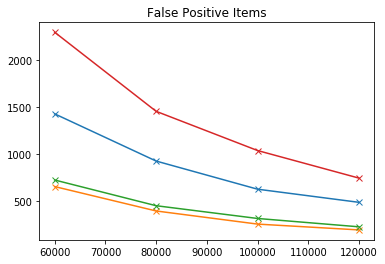

In [56]:
plt.plot([6*10**4, 8*10**4, 1*10**5, 1.2*10**5], FP_item_train['original'], 'x-', label = 'original learned Bloom filter')
plt.plot([6*10**4, 8*10**4, 1*10**5, 1.2*10**5], FP_item_train['enhanced'], 'x-', label = 'enhanced learned Bloom filter')
plt.plot([6*10**4, 8*10**4, 1*10**5, 1.2*10**5], FP_item_train['blocked'], 'x-', label = 'blocked learned Bloom filter')
plt.plot([6*10**4, 8*10**4, 1*10**5, 1.2*10**5], FP_item_train['sandwich'], 'x-', label = 'sandwiching learned Bloom filter')
plt.title('False Positive Items')
plt.show()

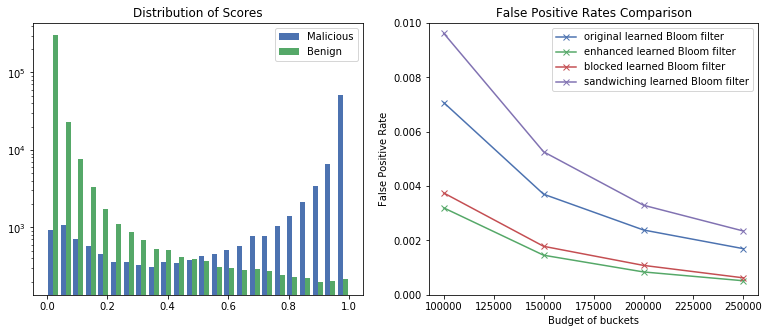

In [45]:
from matplotlib import gridspec

fig = plt.figure(figsize = (13,5))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])
ax0 = plt.subplot(gs[0])
# ax0.style.use('seaborn-deep')

x = train_data.loc[train_data.loc[:,'label']==1,'score']
y = train_data.loc[train_data.loc[:,'label']==-1,'score']
bins = np.linspace(0, 1, 25)
ax0.hist([x, y], bins, log=True, label=['Malicious', 'Benign'])
ax0.legend(loc='upper right')
ax0.set_title('Distribution of Scores')

ax1 = plt.subplot(gs[1])
ax1.plot([10*10**4, 15*10**4, 20*10**4, 25*10**4], FPR_train['original'], 'x-', label = 'original learned Bloom filter')
ax1.plot([10*10**4, 15*10**4, 20*10**4, 25*10**4], FPR_train['enhanced'], 'x-', label = 'enhanced learned Bloom filter')
ax1.plot([10*10**4, 15*10**4, 20*10**4, 25*10**4], FPR_train['blocked'], 'x-', label = 'blocked learned Bloom filter')
ax1.plot([10*10**4, 15*10**4, 20*10**4, 25*10**4], FPR_train['sandwich'], 'x-', label = 'sandwiching learned Bloom filter')
ax1.set_title('False Positive Rates Comparison')
ax1.legend(loc='upper right')
ax1.set_xticks(np.arange(100000, 260000, 25000))
ax1.set_ylim(0, 0.01)
ax1.set_xlabel('Budget of buckets')
ax1.set_ylabel('False Positive Rate')

fig.savefig('FPR_benchmark_allsample.png')